In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
import joblib

In [2]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [3]:
df = pd.read_csv("forestfires.csv")
print("Data Shape:", df.shape)
df.head()

Data Shape: (517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


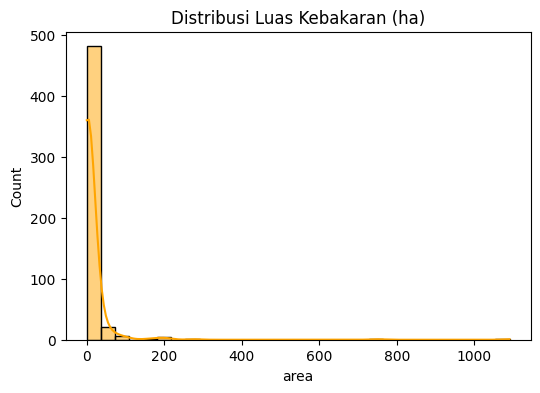

In [4]:
# Distribusi luas kebakaran
plt.figure(figsize=(6,4))
sns.histplot(df['area'], bins=30, kde=True, color='orange')
plt.title("Distribusi Luas Kebakaran (ha)")
plt.show()

In [9]:
df_encoded = df.copy()
label_encoder = LabelEncoder()
df_encoded['month'] = label_encoder.fit_transform(df_encoded['month'])
df_encoded['day'] = label_encoder.fit_transform(df_encoded['day'])

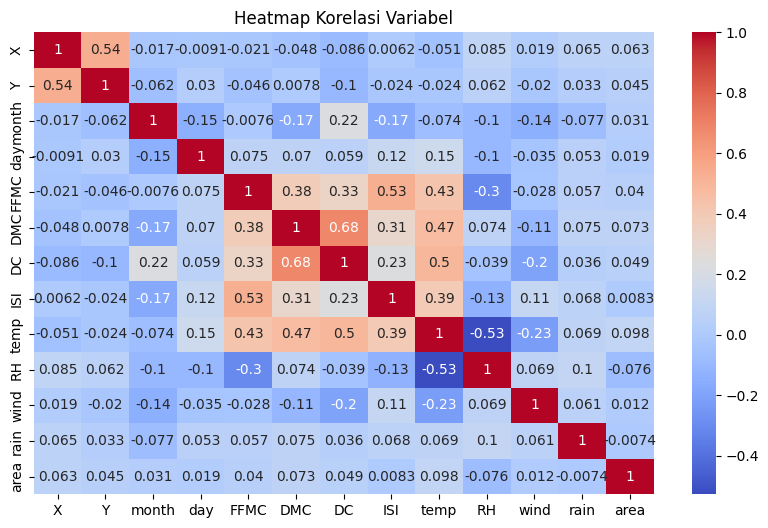

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Variabel")
plt.show()

 5. Preprocessing Data untuk Model

In [14]:
df['month'] = label_encoder.fit_transform(df['month'])
df['day'] = label_encoder.fit_transform(df['day'])

X = df.drop(columns=['area'])
y = df['area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

6. Model 1: Linear Regression

In [15]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)

print("\n--- Evaluasi Linear Regression ---")
print("MAE:", mean_absolute_error(y_test, y_pred_lin))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("R²:", r2_score(y_test, y_pred_lin))


--- Evaluasi Linear Regression ---
MAE: 24.58229724034493
RMSE: 108.39254196967966
R²: 0.003293158248679595


7. Model 2: Random Forest Regressor

In [16]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n--- Evaluasi Random Forest ---")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R²:", r2_score(y_test, y_pred_rf))


--- Evaluasi Random Forest ---
MAE: 27.5367071565934
RMSE: 109.95809471675032
R²: -0.025706361387748178


8. Feature Importance

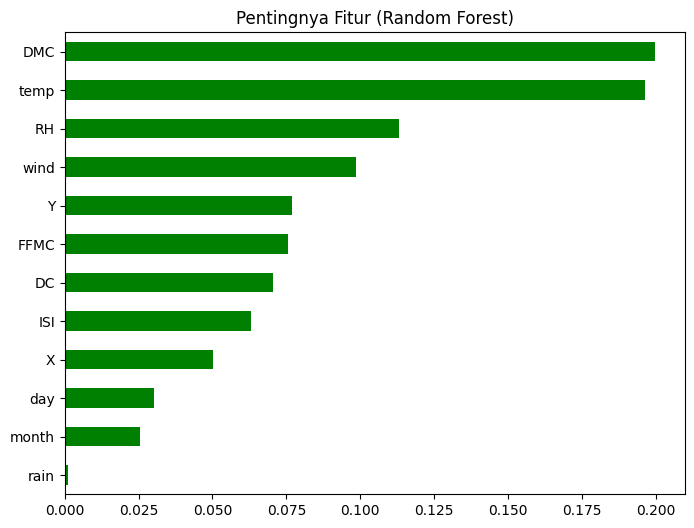

In [17]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8,6), color='green')
plt.title("Pentingnya Fitur (Random Forest)")
plt.show()

9. Simpan Model & Dataset

In [18]:
joblib.dump(rf, "random_forest_forestfires.pkl")
df.to_csv("processed_forestfires.csv", index=False)

print("\nFile model & dataset tersimpan. Siap diunduh dan upload ke GitHub.")

files.download("random_forest_forestfires.pkl")
files.download("processed_forestfires.csv")


File model & dataset tersimpan. Siap diunduh dan upload ke GitHub.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>